In [1]:
import datetime
import sys, os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import scanpy as sc
sc.logging.print_memory_usage()
sc.settings.verbosity = 2
sc.settings.set_figure_params(dpi = 300, dpi_save = 300)
sc.logging.print_header()
from matplotlib.pyplot import rc_context

Memory usage: current 0.21 GB, difference +0.21 GB
scanpy==1.10.2 anndata==0.10.8 umap==0.5.5 numpy==1.26.4 scipy==1.13.0 pandas==2.0.3 scikit-learn==1.4.2 statsmodels==0.14.2 igraph==0.11.6 pynndescent==0.5.13


In [3]:
import decoupler as dc

In [4]:
# add the utility functions folder to PATH
sys.path.append(os.path.abspath("../packages"))
from db_dev.helper import *

In [5]:
import matplotlib as mpl
mpl.rc("font", family = "Arial")
mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42


In [6]:
#load data with leiden
#home_dir = os.path.expanduser("~")
current_directory = os.getcwd()
adata = sc.read_h5ad(current_directory+"/backups/bb2_bb3_leiden_2.5_sub_DGE_refined_annotation_86447x37733_241107_10h51.h5ad")

In [7]:
#Loading obs
current_directory = os.getcwd()
# overwrite obs with the most recent version
filename = current_directory+"/backups/anno_obs_info_86447x39_250127_18h19.npz"
encoding = "latin1"

with np.load(filename, encoding=encoding, allow_pickle = True) as f:
    obs = pd.DataFrame(**f)

obs_cell_type_sub_prolif_anno = obs[["barcode", "library", "cell_type_sub_prolif_anno"]]

# Perform a left join
updated_obs = adata.obs.merge(obs_cell_type_sub_prolif_anno, on=["library", "barcode"], how="left")

# Update the adata.obs with the new annotations
adata.obs = updated_obs


In [8]:
# Dictionary for renaming
rename_dict = {
    "Cycling B cells" : "B cells",
    "Cycling T cells" : "T cells",
    "Tem/Temra cytotoxic T cells": "T cells",
    "Tem/Effector helper T cells": "T cells",
    "Tcm/Naive helper T cells": "T cells",
    "Tcm/Naive cytotoxic T cells": "T cells",
    "MAIT T cells": "T cells",
    "Regulatory T cells": "T cells",
    "Precursors of Neutrophils": "Neutrophils",
    "Early Immature Neutrophils": "Neutrophils",
    "Immature Neutrophils": "Neutrophils",
    "Mature Neutrophils": "Neutrophils",
    "Aged Neutrophils": "Neutrophils",
    "CD14 Monocytes": "Monocytes",
    "CD16 Monocytes": "Monocytes",
    "pDC": "Dendritic cells",
    "Naive B cells": "B cells",
    "Memory B cells": "B cells",
    "Plasma cells": "B cells",
    "NK cells": "NK cells",
    "Basophils": "Basophils",
    "cDC": "Dendritic cells",
    "Platelets": "Platelets",
    "Erythrocytes": "Erythrocytes",

    "AML cells 1": "AML cells 1",
    "AML cells 2": "AML cells 2",
    "AML cells 3": "AML cells 3",
    "AML cells 4": "AML cells 4",
    "AML cells 5": "AML cells 5",
    "AML cells 6": "AML cells 6",
    "AML cells 7": "AML cells 7",
    "AML cells 8": "AML cells 8",
    "AML cells 9": "AML cells 9",
    "AML cells 10": "AML cells 10",

    "Cycling AML cells 1": "Cycling AML cells 1",
    "Cycling AML cells 2": "Cycling AML cells 2",
  

    "AML Monocytes 1": "AML Monocytes 1",
    "AML Monocytes 2": "AML Monocytes 2",

    "Cycling AML Monocytes":  "Cycling AML Monocytes"
 
}

# Rename
adata.obs["cell_type_simplified"] = adata.obs["cell_type_sub_prolif_anno"].map(rename_dict)
adata.obs["cell_type_simplified"] = pd.Categorical(adata.obs["cell_type_simplified"])



In [9]:
adata.obs['cell_type_simplified'].cat.categories

Index(['AML Monocytes 1', 'AML Monocytes 2', 'AML cells 1', 'AML cells 10',
       'AML cells 2', 'AML cells 3', 'AML cells 4', 'AML cells 5',
       'AML cells 6', 'AML cells 7', 'AML cells 8', 'AML cells 9', 'B cells',
       'Basophils', 'Cycling AML Monocytes', 'Cycling AML cells 1',
       'Cycling AML cells 2', 'Dendritic cells', 'Erythrocytes', 'Monocytes',
       'NK cells', 'Neutrophils', 'Platelets', 'T cells'],
      dtype='object')

In [11]:
#subset adata

select_cell_type = "B cells"


select_control_sample = "KC"
select_condition_sample = "UL"


select_sample = [
    select_condition_sample,
    select_control_sample
]
sample_mask = adata.obs["sample"].isin(select_sample)



In [12]:
adata = adata[sample_mask].copy()

/Users/denis/mambaforge/envs/capseq_dge/lib/python3.12/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [15]:
# Get filtered pseudo-bulk profile
pdata = dc.get_pseudobulk(
    adata,
    sample_col = "sample_code",
    groups_col = "cell_type_simplified",
    layer = "counts",
    mode = "sum",
    min_cells = 10,
    min_counts = 1000
)
pdata

AnnData object with n_obs × n_vars = 147 × 31948
    obs: 'sample_code', 'sample', 'code', 'cell_type_simplified', 'psbulk_n_cells', 'psbulk_counts'
    var: 'mt', 'ribo'
    layers: 'psbulk_props'

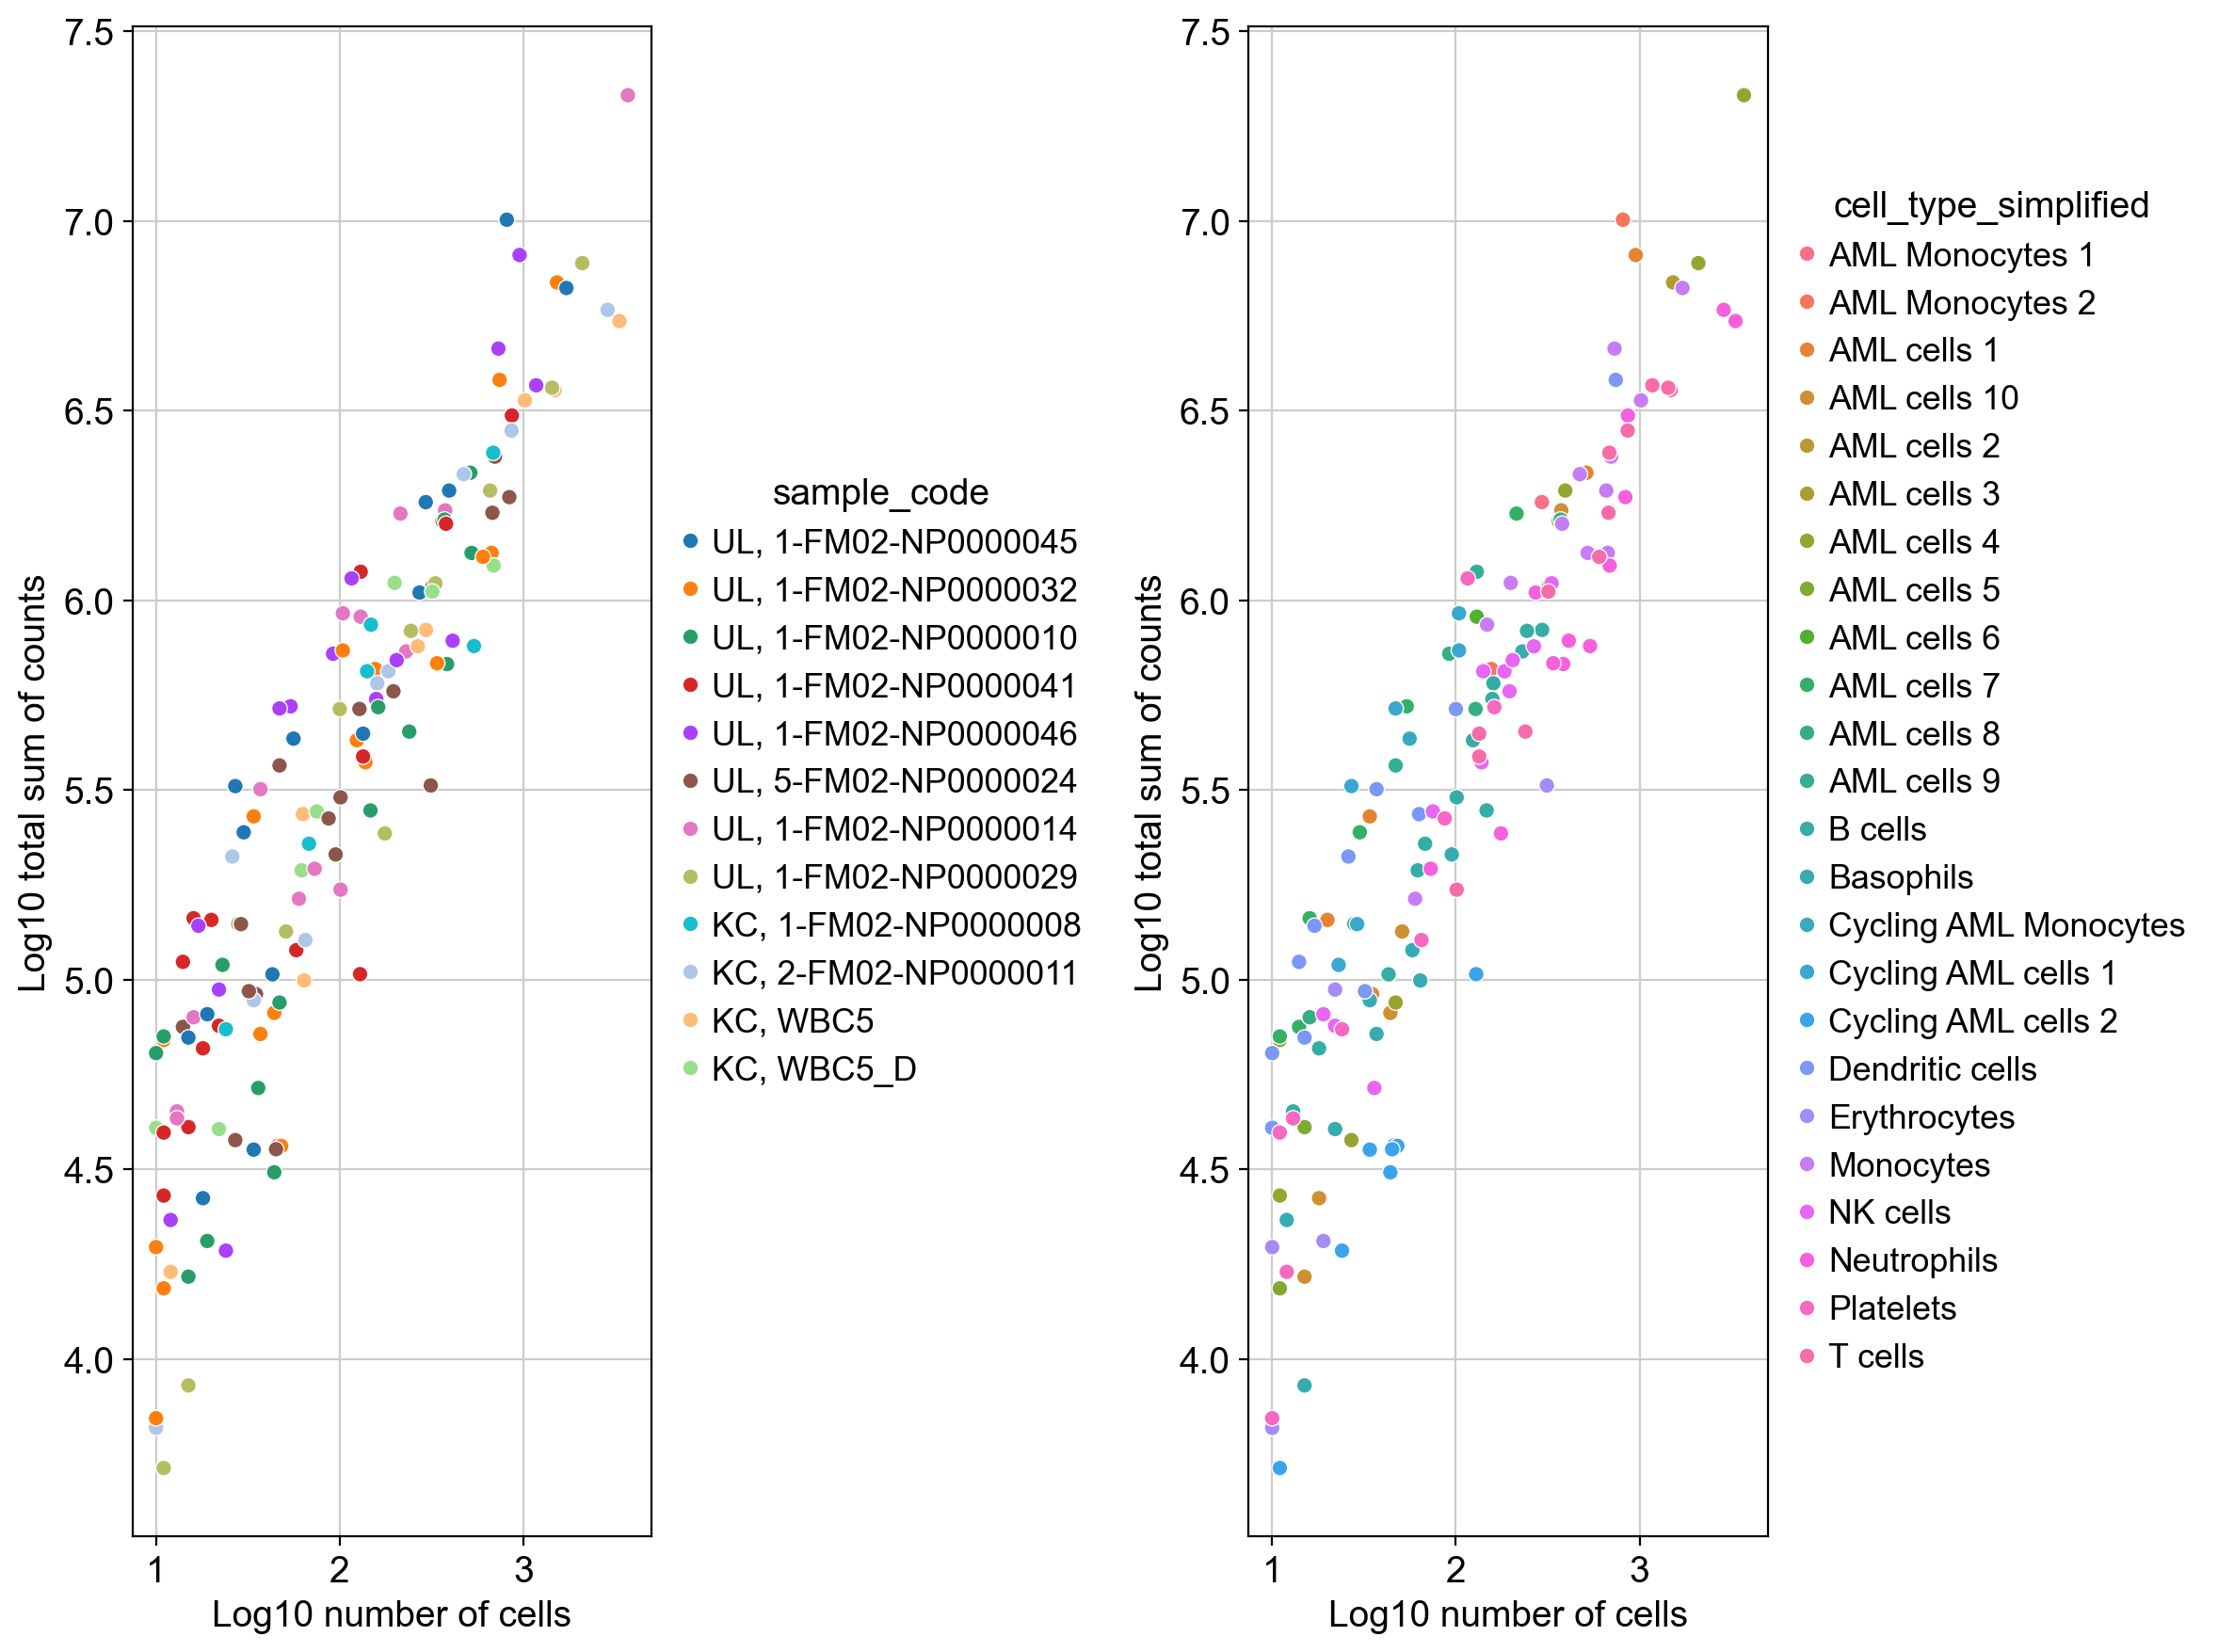

In [16]:
dc.plot_psbulk_samples(pdata, groupby=["sample_code", "cell_type_simplified"], figsize=(12, 9))

In [17]:
pdata

AnnData object with n_obs × n_vars = 147 × 31948
    obs: 'sample_code', 'sample', 'code', 'cell_type_simplified', 'psbulk_n_cells', 'psbulk_counts'
    var: 'mt', 'ribo'
    layers: 'psbulk_props'

In [18]:
# Store raw counts in layers
pdata.layers["counts"] = pdata.X.copy()

# Normalize, scale and compute pca
sc.pp.normalize_total(pdata, target_sum = 1e4)
sc.pp.log1p(pdata)
sc.pp.scale(pdata, max_value = 10)
sc.tl.pca(pdata)

# Return raw counts to X
dc.swap_layer(pdata, "counts", X_layer_key=None, inplace=True)

normalizing counts per cell
    finished (0:00:00)
computing PCA
    with n_comps=50
    finished (0:00:00)


In [19]:
pdata

AnnData object with n_obs × n_vars = 147 × 31948
    obs: 'sample_code', 'sample', 'code', 'cell_type_simplified', 'psbulk_n_cells', 'psbulk_counts'
    var: 'mt', 'ribo', 'mean', 'std'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'psbulk_props', 'counts'

In [20]:
# Select B cells profiles
print(select_cell_type)
b_cells = pdata[pdata.obs["cell_type_simplified"] == select_cell_type].copy()

B cells


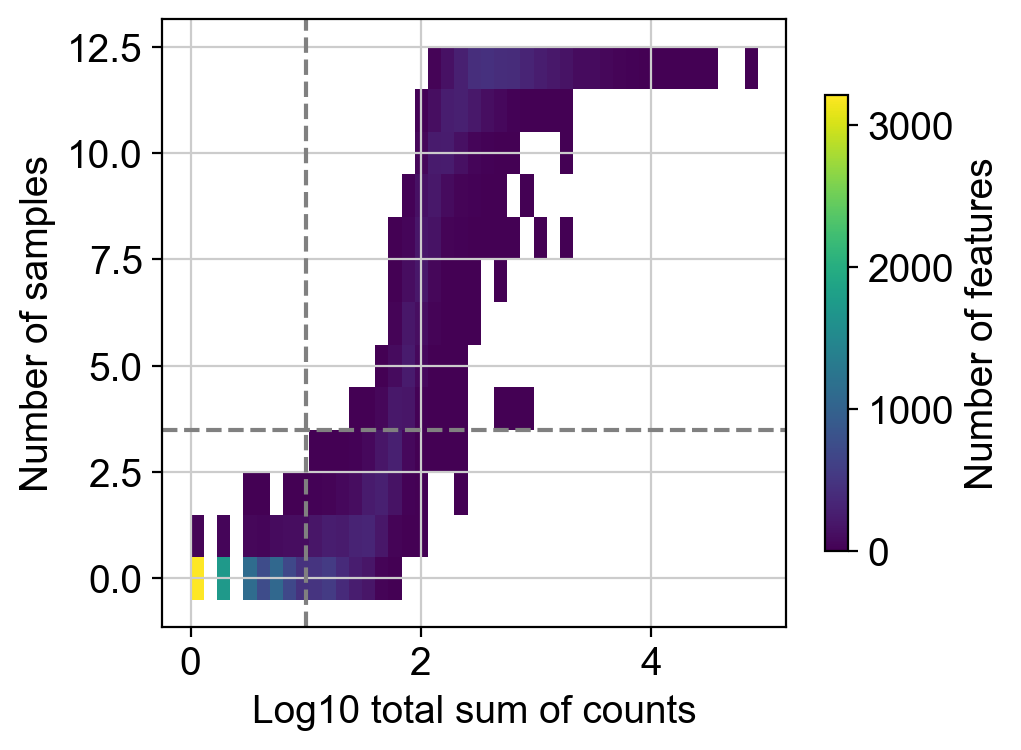

In [21]:
dc.plot_filter_by_expr(b_cells, group = "sample", min_count = 5, min_total_count = 10)


In [22]:
# Obtain genes that pass the thresholds
genes = dc.filter_by_expr(b_cells, group = "sample", min_count = 5, min_total_count = 10)

# Filter by these genes
b_cells = b_cells[:, genes].copy()
b_cells


AnnData object with n_obs × n_vars = 12 × 7889
    obs: 'sample_code', 'sample', 'code', 'cell_type_simplified', 'psbulk_n_cells', 'psbulk_counts'
    var: 'mt', 'ribo', 'mean', 'std'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'psbulk_props', 'counts'

In [23]:
# Import DESeq2
from pydeseq2.dds import DeseqDataSet, DefaultInference
from pydeseq2.ds import DeseqStats

In [24]:
b_cells.obs["sample"].unique()

array(['KC', 'UL'], dtype=object)

In [25]:
# Build DESeq2 object
inference = DefaultInference(n_cpus = 8)
dds = DeseqDataSet(
    adata = b_cells,
    design_factors = "sample",
    ref_level = ["sample", select_control_sample],
    refit_cooks = True,
    inference = inference,
)

In [26]:
# Compute LFCs
dds.deseq2()

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 1.02 seconds.

Fitting dispersion trend curve...
... done in 0.10 seconds.

Fitting MAP dispersions...
... done in 1.00 seconds.

Fitting LFCs...
... done in 0.90 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 10 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.



In [27]:
# Extract contrast between AML vs HD
stat_res = DeseqStats(
    dds,
    contrast=["sample", select_condition_sample, select_control_sample],
    inference = inference,
)

In [28]:
# Compute Wald test
stat_res.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: sample UL vs KC
         baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
AAGAB   14.096520        0.484195  0.396695  1.220572  0.222248       NaN
AAK1    12.253894        0.319466  0.518711  0.615885  0.537970       NaN
AAMDC    5.474077       -0.122906  0.504792 -0.243478  0.807635       NaN
AAMP     4.912142       -0.391104  0.650702 -0.601049  0.547807       NaN
AAR2     4.213575        0.071179  0.534885  0.133073  0.894136       NaN
...           ...             ...       ...       ...       ...       ...
ZXDC    19.280400       -0.147337  0.349878 -0.421109  0.673676       NaN
ZYG11B  11.701617       -0.343640  0.377146 -0.911158  0.362212       NaN
ZYX      6.829592        0.355395  0.471943  0.753047  0.451422       NaN
ZZEF1   33.584818       -0.121922  0.251184 -0.485391  0.627399  0.997818
ZZZ3    40.443601        0.008177  0.269191  0.030377  0.975766  0.997818

[7889 rows x 6 columns]


... done in 0.52 seconds.



In [29]:
# Extract results
results_df = stat_res.results_df
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
AAGAB,14.096520,0.484195,0.396695,1.220572,0.222248,NaN
AAK1,12.253894,0.319466,0.518711,0.615885,0.537970,NaN
AAMDC,5.474077,-0.122906,0.504792,-0.243478,0.807635,NaN
AAMP,4.912142,-0.391104,0.650702,-0.601049,0.547807,NaN
AAR2,4.213575,0.071179,0.534885,0.133073,0.894136,NaN
...,...,...,...,...,...,...
ZXDC,19.280400,-0.147337,0.349878,-0.421109,0.673676,NaN
ZYG11B,11.701617,-0.343640,0.377146,-0.911158,0.362212,NaN
ZYX,6.829592,0.355395,0.471943,0.753047,0.451422,NaN
ZZEF1,33.584818,-0.121922,0.251184,-0.485391,0.627399,0.997818


In [30]:
# Export volcano genes
results_df.to_csv("dge/pseudobulk_volcano_b_cells_AML_vs_HD.csv")


results_df_sorted = results_df.copy()
results_df_sorted[results_df_sorted["padj"] < 0.05].sort_values(by = "log2FoldChange", ascending=False, key=abs).to_excel("dge/pseudobulk_volcano_b_cells_AML_vs_HD_filtered_by_padj.xlsx")




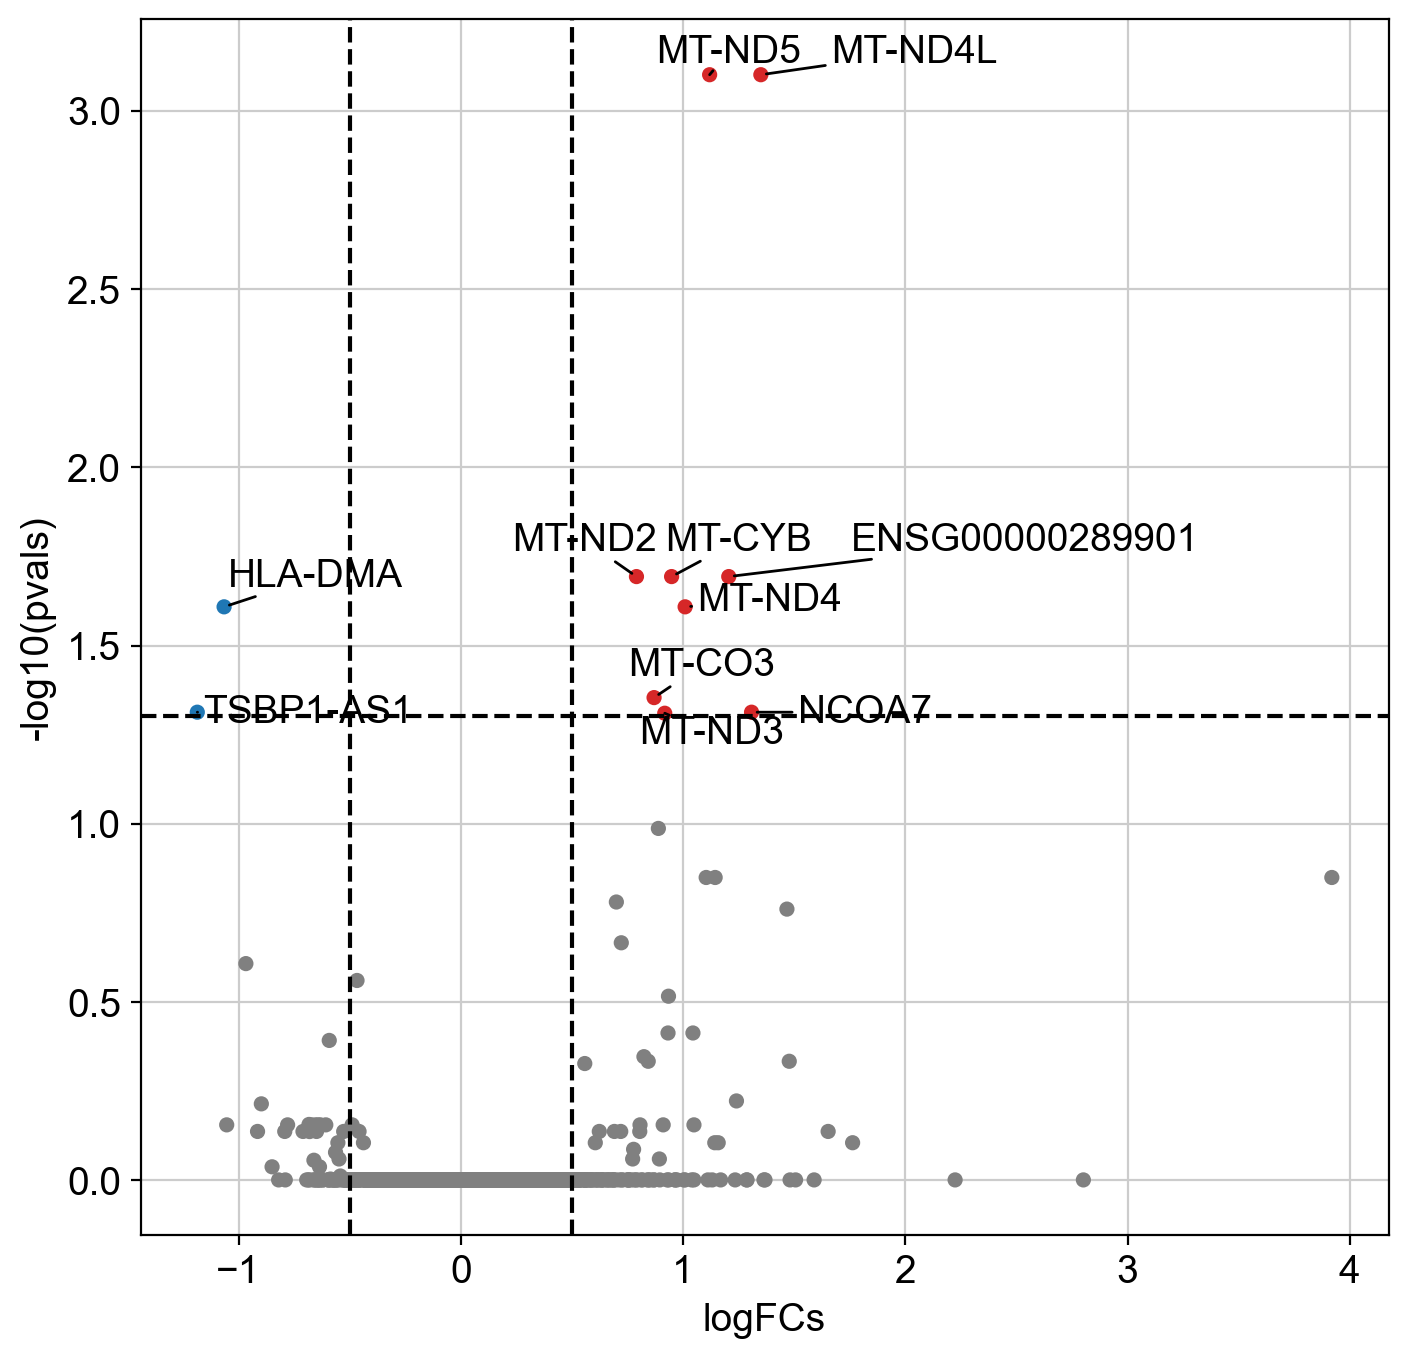

In [31]:
fig = dc.plot_volcano_df(
    results_df,
    x = "log2FoldChange",
    y = "padj",
    top = 50,
    figsize = (8, 8), return_fig = True
)
